# Точечные значения

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть H\
https://darribas.org/gds_course/content/bH/diy_H.html

**Задачи проекта:**

**Задание 1. Распространение объектов недвижимости AirBnb в Пекине**

*Описание проекта:*\
Изучить закономерности распределения местоположения объектов AirBnb в Пекине.

*Исходные данные:*\
Данные объектов недвижимости AirBnb в Пекине.\
Ссылка на данные:\
https://www.kaggle.com/datasets/merryyundi/airbnb-beijing-20190211

Границы районов Пекина.\
Ссылка на данные:\
http://data.insideairbnb.com/china/beijing/beijing/2023-03-29/visualisations/neighbourhoods.geojson

*Задачи:*
1.   С помощью гексагональной сетки создать карту расположения объектов недвижимости;
2.   Вычислить и отобразить на карте оценку плотности ядра (KDE) распределения объектов недвижимости;
3.   Используя слой с районами:
   *   Посчитать количество недвижимости по районам;
   *   Создать картограмму с отображением количества объектов недвижимости по районам;
   *   Создать картограмму с отображением плотности объектов недвижимости по районам.

**Задание 2. Кластеры индийских городов**

*Описание проекта:*\
Изучить закономерности распределения местоположения индийских городов.

*Исходные данные:*\
Набор данных о местоположении населенных пунктов в Индии, предоставленный http://geojson.xyz.

Ссылка на данные:\
https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson

*Задачи:*
1.   Для идентификации кластеров воспользоваться алгоритмом DBSCAN;
2.   Использовать следующие параметры: в качестве минимального количества кластеров взять пять городов и расстояние максимум 1000 км;
3.   Нанести кластеры на карту. Можно ли выявить какой-либо паттерн?
4.   Основываясь на приведенных выше результатах, изменить значения обоих параметров (количество городов и расстояние), чтобы найти группу южных городов и еще одну группу городов на севере вокруг Нью-Дели.

## Этап 1. Импорт библиотек и загрузка данных

### Импорт библиотек

In [ ]:
# Установим библиотеку 'pysal'
! pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/24

In [ ]:
# Установим библиотеку 'contextily'
! pip install contextily

In [ ]:
# Импортируем библиотеки
# Манипуляция данными
import pandas as pd
import numpy as np

# Карта
import geopandas as gpd

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

# Контекст
import contextily as cx

# Машинное обучение, кластеризация
from sklearn.cluster import DBSCAN

# Интерактивность
from ipywidgets import interact, fixed

# Добыча данных
import requests
import base64
import zipfile
import io

### Настройка отображения данных

In [ ]:
# Настроим отображение максимального количества колонок
pd.set_option('display.max_columns', None)

## Этап 2. Ответы на вопросы исследования

### Задание 1. Распространение объектов недвижимости AirBnb в Пекине

**Задание 1. Распространение объектов недвижимости AirBnb в Пекине**

*Описание проекта:*\
Изучить закономерности распределения местоположения объектов AirBnb в Пекине.

*Исходные данные:*\
Данные объектов недвижимости AirBnb в Пекине.\
Ссылка на данные:\
https://www.kaggle.com/datasets/merryyundi/airbnb-beijing-20190211

Границы районов Пекина.\
Ссылка на данные:\
http://data.insideairbnb.com/china/beijing/beijing/2023-03-29/visualisations/neighbourhoods.geojson

*Задачи:*
1.   С помощью гексагональной сетки создать карту расположения объектов недвижимости;
2.   Вычислить и отобразить на карте оценку плотности ядра (KDE) распределения объектов недвижимости;
3.   Используя слой с районами:
   *   Посчитать количество недвижимости по районам;
   *   Создать картограмму с отображением количества объектов недвижимости по районам;
   *   Создать картограмму с отображением плотности объектов недвижимости по районам.

#### Исходные данные

##### Объекты недвижимости AirBnb

How to get Kaggle dataset through API using Python\
https://medium.com/@antonin.puskarcik/how-to-get-kaggle-dataset-through-api-using-python-8ead6a58d68b

In [ ]:
#1: Ссылка на сайт
# https://www.kaggle.com/datasets/merryyundi/airbnb-beijing-20190211
base_url = "https://www.kaggle.com/api/v1"
owner_slug = "merryyundi"
dataset_slug = "airbnb-beijing-20190211"
# dataset_version = "5"

# url = f"{base_url}/datasets/download/{owner_slug}/{dataset_slug}?datasetVersionNumber={dataset_version}"
url = f"{base_url}/datasets/download/{owner_slug}/{dataset_slug}"

#2: Кодировка учетных данных и подготовка заголовка запроса
username = "<>"
key = "<>"
creds = base64.b64encode(bytes(f"{username}:{key}", "ISO-8859-1")).decode("ascii")
headers = {
  "Authorization": f"Basic {creds}"
}

#3: Отправка запроса GET на URL с закодированными учетными данными
response = requests.get(url, headers=headers)

#4: Загрузка ответа в виде файла через io и его открытие через zipfile
zf = zipfile.ZipFile(io.BytesIO(response.content))

#5: Считывание CSV из zip-файла и его преобразование в рамку данных
file_name = "listings.csv"
df = pd.read_csv(zf.open(file_name))

#6: Печать датафрейма
df.head(1)

<ipython-input-153-c6750733cafe>:27: DtypeWarning: Columns (43,61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zf.open(file_name))


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20190211162202,2019-02-11,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,"*For long term reservations (over 90 days), pl...",The easiest method to get around is by taxi or...,*Guests have access to the Fulicheng gardens,NaN,Registration All guests are required to have a...,NaN,NaN,https://a0.muscache.com/im/pictures/ccadd958-6...,NaN,192875,https://www.airbnb.com/users/show/192875,East Apartments,2010-08-06,"Beijing, Beijing, China",Hi everyone! My name is Sev. I'm the Owner/O...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/9ea49dd1-d...,https://a0.muscache.com/im/pictures/9ea49dd1-d...,Shuangjing,10,10,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Beijing, Beijing, China",Shuangjing,朝阳区 / Chaoyang,NaN,Beijing,Beijing,100022,Beijing,"Beijing, China",CN,China,39.89503,116.451635,t,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1464.0,$796.00,"$7,979.00","$26,305.00",$674.00,$67.00,7,$67.00,1,365,1,1,365,365,1.0,365.0,2 weeks ago,t,24,50,80,351,2019-02-11,87,24,2010-08-25,2018-12-28,91.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,10,8,2,0,0.84


In [ ]:
# Посмотрим на уникальные значения в столбце 'neighbourhood_cleansed'
df['neighbourhood_cleansed'].unique()

array(['朝阳区 / Chaoyang', '密云县 / Miyun', '东城区', '西城区', '海淀区',
       '顺义区 / Shunyi', '房山区', '石景山区', '通州区 / Tongzhou', '怀柔区 / Huairou',
       '昌平区', '丰台区 / Fengtai', '大兴区 / Daxing', '延庆县 / Yanqing',
       '门头沟区 / Mentougou', '平谷区 / Pinggu'], dtype=object)

In [ ]:
# Выведем наименования всех столбцов в алфавитном порядке
df.columns.sort_values(ascending=True).to_list()

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [ ]:
# Оставим только необходимые столбцы
beijing = df[[
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
    ]]

In [ ]:
# Переименуем столбец 'neighbourhood_cleansed'
beijing = beijing.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

In [ ]:
# Проверим правильность выполнения функции
beijing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

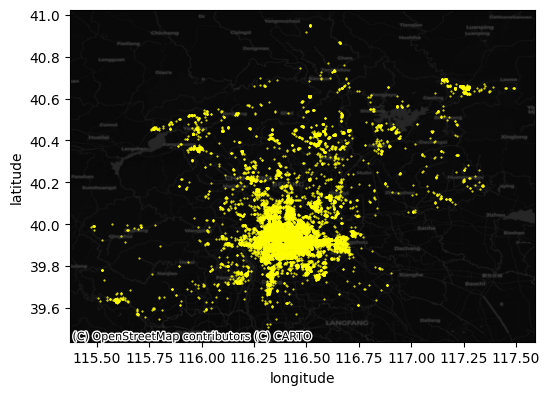

In [ ]:
beijing_gdf = gpd.GeoDataFrame(
    {
        "geometry" : gpd.points_from_xy(
            beijing['longitude'], beijing['latitude']
            )
        }, crs="EPSG:4326"
        ).join(beijing)
# Построим график
ax = beijing_gdf.plot.scatter(
    'longitude',
    'latitude',
    color='xkcd:bright yellow',
    figsize=(6,6),
    s=0.25
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=beijing_gdf.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
plt.show();

In [ ]:
# Выведем основную информацию датасета 'beijing_gdf'
beijing_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25921 entries, 0 to 25920
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   geometry                        25921 non-null  geometry
 1   id                              25921 non-null  int64   
 2   name                            25919 non-null  object  
 3   host_id                         25921 non-null  int64   
 4   host_name                       25921 non-null  object  
 5   neighbourhood                   25921 non-null  object  
 6   latitude                        25921 non-null  float64 
 7   longitude                       25921 non-null  float64 
 8   room_type                       25921 non-null  object  
 9   price                           25921 non-null  object  
 10  minimum_nights                  25921 non-null  int64   
 11  number_of_reviews               25921 non-null  int64   
 12  last_revie

##### Границы нейборхудов

In [ ]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [ ]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving neighbourhoods.geojson to neighbourhoods (4).geojson


<Axes: >

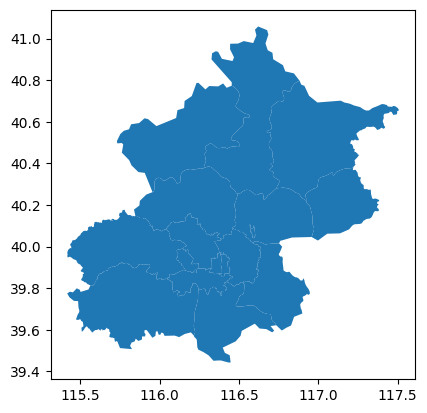

In [ ]:
# Извлечем данные с полигонами
neis = gpd.read_file('/content/neighbourhoods.geojson')
# Построим график
neis.plot()

In [ ]:
# Проверим текущую систему координат
neis.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Посмотрим на уникальные значения в столбце 'neighbourhood' датасета 'neis'
# neis['neighbourhood'].unique()

In [ ]:
# Посмотрим на количество уникальных значений в столбце 'neighbourhood' датасета 'neis'
# neis['neighbourhood'].nunique()

In [ ]:
# Посмотрим на уникальные значения в столбце 'neighbourhood_cleansed' датасета 'beijing_gdf'
# beijing_gdf['neighbourhood'].unique()

In [ ]:
# Посмотрим на количество уникальных значений в столбце 'neighbourhood_cleansed' датасета 'beijing_gdf'
# beijing_gdf['neighbourhood'].nunique()

##### Объединение датасетов

In [ ]:
# Объединим два датасета 'beijing_gdf' и 'neis'
crosswalk = gpd.sjoin(beijing_gdf, neis, how='inner')
beijing_gdf['neighbourhood'] = crosswalk['neighbourhood_left']
# Выведем первые три значения получившегося датасета
crosswalk.head(3)

,geometry,id,name,host_id,host_name,neighbourhood_left,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,index_right,neighbourhood_right,neighbourhood_group,features_count
0,POINT (116.45163 39.89503),44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区 / Chaoyang,39.895030,116.451635,Entire home/apt,$796.00,1,87,2018-12-28,0.84,10,351,10,朝阳区 / Chaoyang,None,10344
4,POINT (116.43798 39.93668),162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区 / Chaoyang,39.936680,116.437985,Entire home/apt,$540.00,1,37,2018-08-01,0.41,5,362,10,朝阳区 / Chaoyang,None,10344
6,POINT (116.45089 39.93712),282825,Large 2 BR Apt in a great location,1466681,Florence,朝阳区 / Chaoyang,39.937118,116.450888,Entire home/apt,$641.00,3,105,2019-02-10,1.27,1,133,10,朝阳区 / Chaoyang,None,10344


#### Агрегация данных по гексагональной сетке (hexbin)

С помощью гексагональной сетки создадим карту расположения объектов недвижимости.

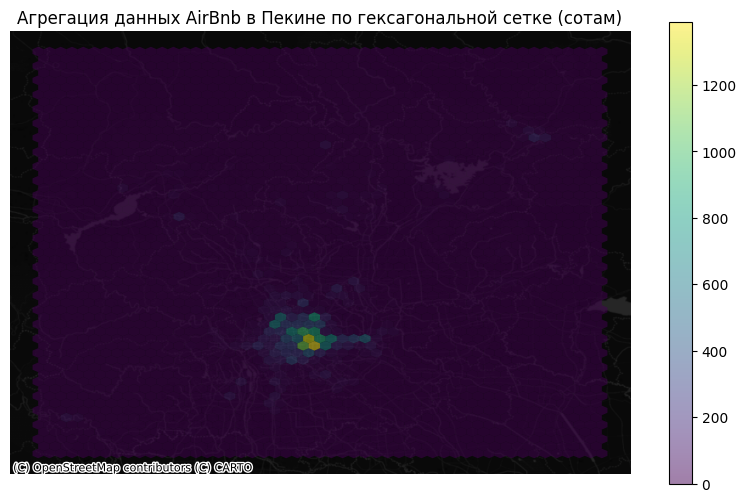

In [ ]:
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(10,6))
# Слой шестиугольников, отображающий количество точек в каждом многоугольнике
hb = ax.hexbin(
    beijing_gdf['longitude'],
    beijing_gdf['latitude'],
    gridsize=50,
    alpha=0.5,
    edgecolor='None'
)
# Цветовая полоса
plt.colorbar(hb)
# Скроем отображение осей
ax.set_axis_off()
# Базовая карта
cx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.DarkMatterNoLabels
)
# Добавим наименование графика
ax.set_title('Агрегация данных AirBnb в Пекине по гексагональной сетке (сотам)')
# Отображение
plt.show()

#### Оценка плотности ядра (KDE)

Вычислим и отобразим на карте оценку плотности ядра (KDE) распределения объектов недвижимости.

<Axes: xlabel='longitude', ylabel='latitude'>

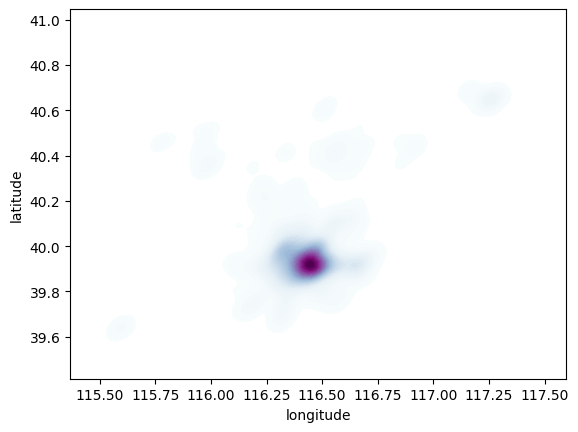

In [ ]:
# График оценки плотности ядра (KDE)
sns.kdeplot(
    x='longitude',
    y='latitude',
    data=beijing_gdf,
    n_levels=50,
    fill=True,
    cmap='BuPu'
    )

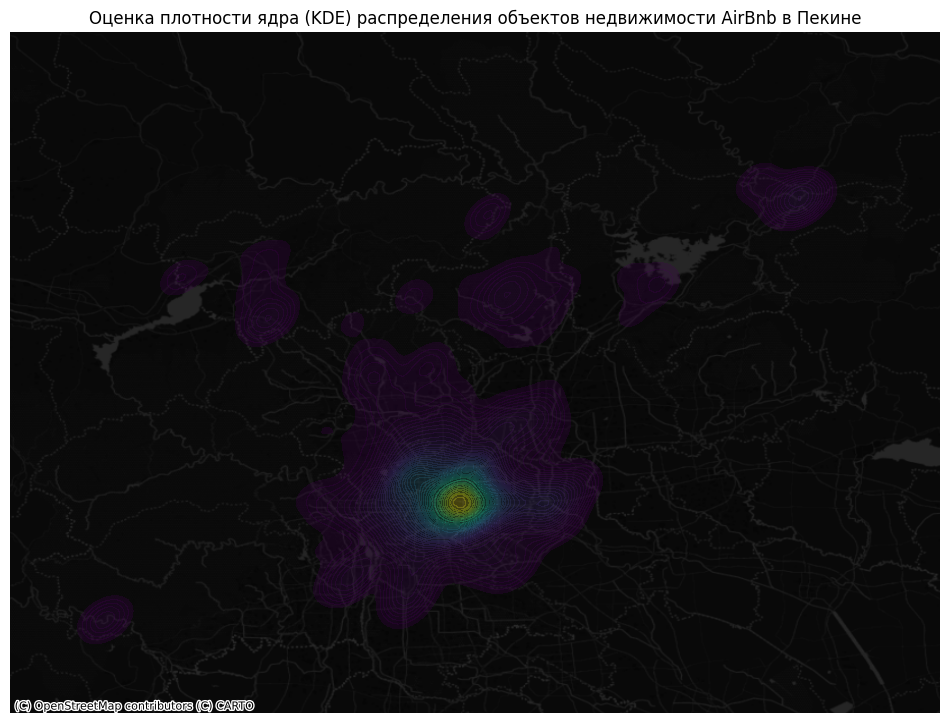

In [ ]:
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(12,12))
# Гафик оценки плотности ядра (KDE)
sns.kdeplot(
    x='longitude',
    y='latitude',
    data=beijing_gdf,
    n_levels=50,
    fill=True,
    cmap='viridis',
    alpha=0.25
    )
# Скроем отображение осей
ax.set_axis_off()
# Базовая карта
cx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.DarkMatterNoLabels
    )
# Добавим наименование графика
ax.set_title('Оценка плотности ядра (KDE) распределения объектов недвижимости AirBnb в Пекине')
# Отображение
plt.show()

#### Агрегация данных по АТД

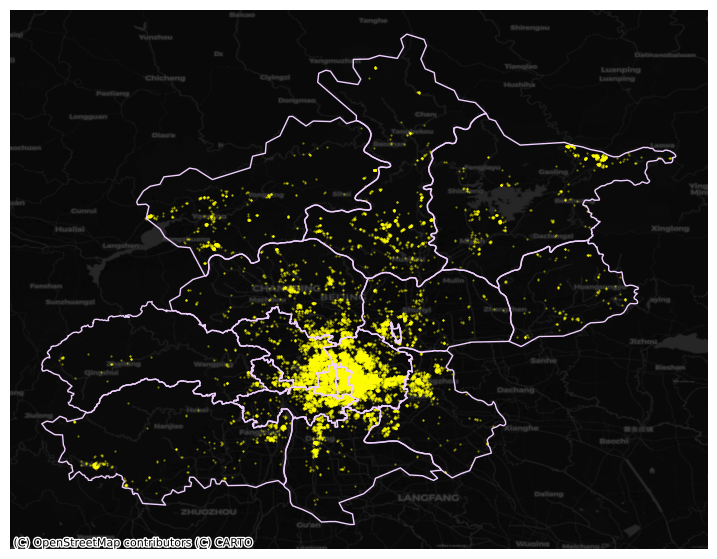

In [ ]:
# График с объектами недвижимости AirBnb в Пекине
ax = beijing_gdf.plot.scatter(
    'longitude',
    'latitude',
    s=0.25,
    c='xkcd:bright yellow',
    alpha=0.5,
    figsize=(9, 9)
    )
# Административные границы
neis.plot(
    ax=ax,
    facecolor='none',
    edgecolor='xkcd:pale lavender'
    )
# Скроем отображение осей
ax.set_axis_off()
# Базовая карта
cx.add_basemap(
    ax,
    crs='EPSG:4326',
    source=cx.providers.CartoDB.DarkMatter
    )
# Отображение
plt.show();

Посчитаем, сколько объектов недвижимости содержит каждый нейборхуд.

In [ ]:
# Подсчет количества точек по нейборхудам и запись полученных значений в датафрейм
features_by_neis = pd.DataFrame({'features_count' : beijing_gdf.groupby('neighbourhood').size()})
# Выведем полученные значения
features_by_neis

,features_count
neighbourhood,
东城区,3178
丰台区 / Fengtai,1458
大兴区 / Daxing,726
密云县 / Miyun,722
平谷区 / Pinggu,116
延庆县 / Yanqing,565
怀柔区 / Huairou,649
房山区,464
昌平区,970


In [ ]:
# В датасете 'neis' установим новый индекс
neis.set_index('neighbourhood')

,neighbourhood_group,geometry
neighbourhood,,
东城区,None,"MULTIPOLYGON (((116.44231 39.90180, 116.44246 ..."
西城区,None,"MULTIPOLYGON (((116.39155 39.89710, 116.39157 ..."
昌平区,None,"MULTIPOLYGON (((116.04274 40.08406, 116.03750 ..."
大兴区 / Daxing,None,"MULTIPOLYGON (((116.73473 39.62160, 116.69884 ..."
房山区,None,"MULTIPOLYGON (((116.24662 39.79181, 116.24320 ..."
怀柔区 / Huairou,None,"MULTIPOLYGON (((116.27899 40.37974, 116.27943 ..."
门头沟区 / Mentougou,None,"MULTIPOLYGON (((115.56297 39.81206, 115.56156 ..."
密云县 / Miyun,None,"MULTIPOLYGON (((116.88258 40.79685, 116.89160 ..."
平谷区 / Pinggu,None,"MULTIPOLYGON (((117.38129 40.22541, 117.38304 ..."


In [ ]:
# Полученные подсчеты количества точек по нейборхудам запишем в новую таблицу и объединим ее с таблицей нейборхудов (геометрией)
neis = neis.join(pd.DataFrame(features_by_neis), on='neighbourhood')
neis

,neighbourhood,neighbourhood_group,geometry,features_count
0,东城区,None,"MULTIPOLYGON (((116.44231 39.90180, 116.44246 ...",3178
1,西城区,None,"MULTIPOLYGON (((116.39155 39.89710, 116.39157 ...",1565
2,昌平区,None,"MULTIPOLYGON (((116.04274 40.08406, 116.03750 ...",970
3,大兴区 / Daxing,None,"MULTIPOLYGON (((116.73473 39.62160, 116.69884 ...",726
4,房山区,None,"MULTIPOLYGON (((116.24662 39.79181, 116.24320 ...",464
5,怀柔区 / Huairou,None,"MULTIPOLYGON (((116.27899 40.37974, 116.27943 ...",649
6,门头沟区 / Mentougou,None,"MULTIPOLYGON (((115.56297 39.81206, 115.56156 ...",129
7,密云县 / Miyun,None,"MULTIPOLYGON (((116.88258 40.79685, 116.89160 ...",722
8,平谷区 / Pinggu,None,"MULTIPOLYGON (((117.38129 40.22541, 117.38304 ...",116
9,延庆县 / Yanqing,None,"MULTIPOLYGON (((116.27899 40.37974, 116.27895 ...",565


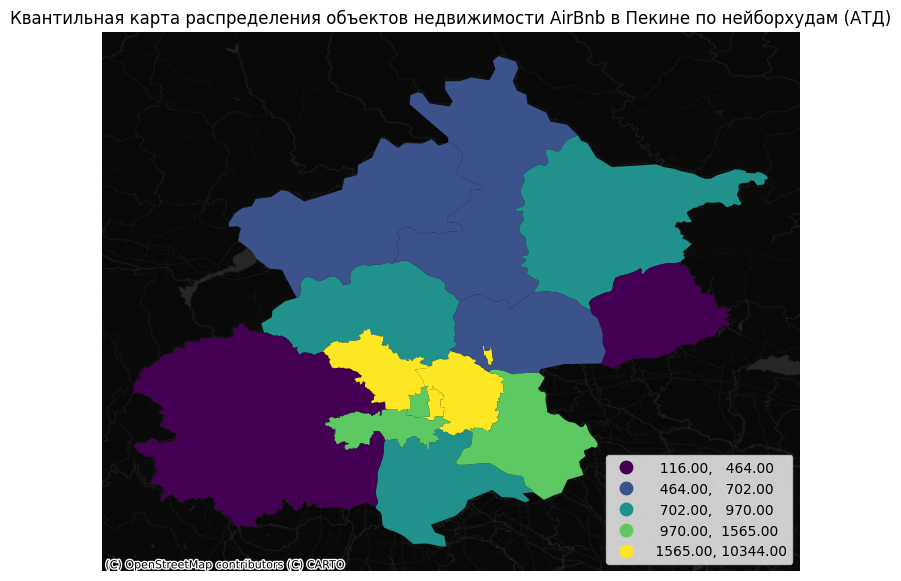

In [ ]:
# Создадим картограмму с отображением количества объектов недвижимости по районам
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График с равными интервалами
neis.plot(
    column='features_count',
    scheme='quantiles',
    ax=ax,
    legend=True,
    legend_kwds={'loc': 4},
    alpha=1
    )
# Скроем отображение осей
ax.set_axis_off()
# Добавим наименование графика
ax.set_title('Квантильная карта распределения объектов недвижимости AirBnb в Пекине по нейборхудам (АТД)')
# Базовая карта
cx.add_basemap(
    ax,
    crs='EPSG:4326',
    source=cx.providers.CartoDB.DarkMatterNoLabels
    )
# Отображение
plt.show();

In [ ]:
# Вычислим площадь каждого района и запишем получившиеся значения в отдельный столбец
neis['area_sqkm'] =  neis.to_crs('3857').area * 1e-6
# # Вычислим плотность объектов недвижимости по районам
neis['features_density'] = neis['features_count'] / neis["area_sqkm"]

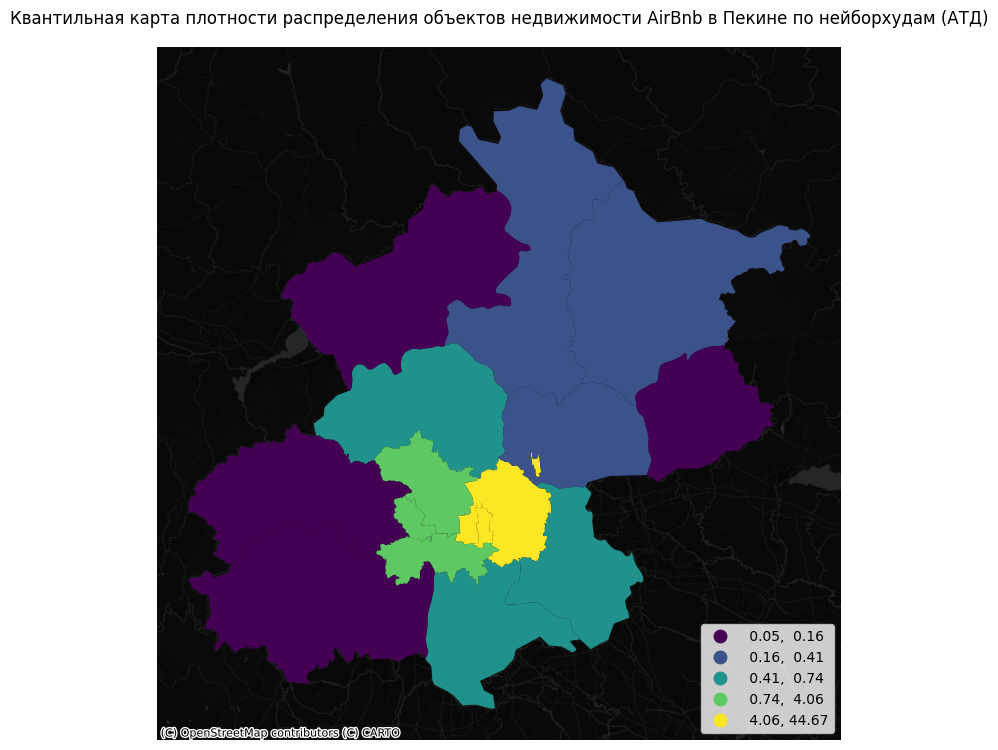

In [ ]:
# Создадим картограмму с отображением плотности объектов недвижимости по районам
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График с равными интервалами
neis.plot(
    column='features_density',
    scheme='quantiles',
    ax=ax,
    legend=True,
    legend_kwds={'loc': 4},
    alpha=1
    )
# Скроем отображение осей
ax.set_axis_off()
# Добавим наименование графика
ax.set_title('Квантильная карта плотности распределения объектов недвижимости AirBnb в Пекине по нейборхудам (АТД)')
# Базовая карта
cx.add_basemap(
    ax,
    crs='EPSG:3857',
    source=cx.providers.CartoDB.DarkMatterNoLabels
    )
# Отображение
plt.show();

**Выводы:**
*   С помощью гексагональной сетки была создана карта расположения объектов недвижимости;
*   Вычислена и отображена на карте оценка плотности ядра (KDE) распределения объектов недвижимости;
*   Используя слой с районами:
   *   Посчитано количество недвижимости по районам;
   *   Создана картограмма с отображением количества объектов недвижимости по районам;
   *   Создана картограмма с отображением плотности объектов недвижимости по районам.

### Задание 2. Кластеры индийских городов

**Задание 2. Кластеры индийских городов**

*Описание проекта:*\
Изучить закономерности распределения местоположения индийских городов.

*Исходные данные:*\
Набор данных о местоположении населенных пунктов в Индии, предоставленный http://geojson.xyz.

Ссылка на данные:\
https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson

*Задачи:*
1.   Для идентификации кластеров воспользоваться алгоритмом DBSCAN;
2.   Использовать следующие параметры: в качестве минимального количества кластеров взять пять городов и расстояние максимум 1000 км;
3.   Нанести кластеры на карту. Можно ли выявить какой-либо паттерн?
4.   Основываясь на приведенных выше результатах, изменить значения обоих параметров (количество городов и расстояние), чтобы найти группу южных городов и еще одну группу городов на севере вокруг Нью-Дели.

#### Исходные данные

In [ ]:
url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson'

In [ ]:
# Загрузим данные через url и сделаем выборку по Индии
places = gpd.read_file(url).query('adm0name == "India"')
places.head()

,scalerank,natscale,labelrank,name,namepar,namealt,diffascii,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,changed,namediff,diffnote,pop_max,pop_min,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,featureclass,geometry
141,4,50,1,Chandigarh,None,None,0,Chandigarh,0,0,None,0,1,India,IND,India,IND,Chandigarh,IN,None,30.719997,76.780006,1,0,Changed scale rank.,979000,914371,2436384,11,11,1274746,Chandigarh,Chandigarh,1,5,Admin-1 capital,POINT (76.77806 30.72194)
142,4,50,1,Jammu,None,None,0,Jammu,0,0,None,0,1,India,IND,India,IND,Jammu and Kashmir,IN,None,32.711788,74.846739,1,0,Changed scale rank.,791000,465567,2567923,11,10,1269321,Jammu,Jammu,1,0,Populated place,POINT (74.84479 32.71373)
143,4,50,1,Sholapur,None,Solapur,0,Sholapur,0,0,None,0,1,India,IND,India,IND,Maharashtra,IN,None,17.670406,75.900008,4,0,Changed scale rank.,1057000,961112,961272,12,11,1256436,Solapur,Sholapur,1,0,Populated place,POINT (75.89806 17.67235)
144,4,50,1,Aurangabad,None,None,0,Aurangabad,0,0,None,0,1,India,IND,India,IND,Maharashtra,IN,None,19.895696,75.320301,0,0,None,1113000,1016441,1191845,12,12,1278149,Aurangabad,Aurangabad2,1,0,Populated place,POINT (75.31836 19.89764)
145,4,50,1,Nasik,None,Nashik,0,Nasik,0,0,None,0,1,India,IND,India,IND,Maharashtra,IN,None,20.000419,73.779982,0,0,None,1473000,1289497,2128331,12,12,1261731,Nashik,Nasik,1,0,Populated place,POINT (73.77804 20.00236)


In [ ]:
# Выведем основную информацию о датафрейме
places.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 69 entries, 141 to 1243
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     69 non-null     int64   
 1   natscale      69 non-null     int64   
 2   labelrank     69 non-null     int64   
 3   name          69 non-null     object  
 4   namepar       7 non-null      object  
 5   namealt       16 non-null     object  
 6   diffascii     69 non-null     int64   
 7   nameascii     69 non-null     object  
 8   adm0cap       69 non-null     int64   
 9   capalt        69 non-null     int64   
 10  capin         0 non-null      object  
 11  worldcity     69 non-null     int64   
 12  megacity      69 non-null     int64   
 13  sov0name      69 non-null     object  
 14  sov_a3        69 non-null     object  
 15  adm0name      69 non-null     object  
 16  adm0_a3       69 non-null     object  
 17  adm1name      69 non-null     object  
 18  iso_a

In [ ]:
# Преобразуем географическую систему координат из 'EPSG:4326' в метричекую 'Kalianpur 1975 / India zone I' (EPSG:24378)
places_m = places.to_crs('EPSG:24378')
places_m.crs

<Projected CRS: EPSG:24378>
Name: Kalianpur 1975 / India zone I
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: India - north of 28°N.
- bounds: (70.35, 28.0, 81.64, 35.51)
Coordinate Operation:
- name: India zone I (1975 metres)
- method: Lambert Conic Conformal (1SP)
Datum: Kalianpur 1975
- Ellipsoid: Everest 1830 (1975 Definition)
- Prime Meridian: Greenwich

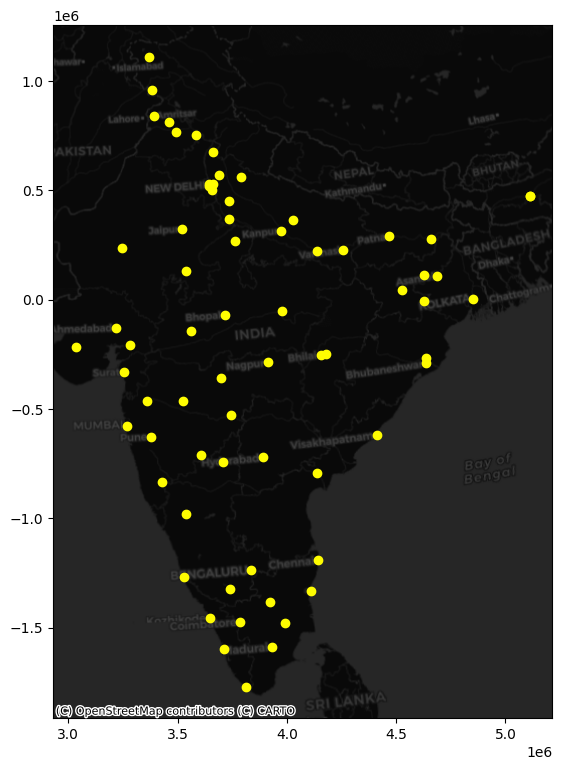

In [ ]:
#  График с расположением имеющихся данных
ax = places_m.plot(
    color='xkcd:bright yellow',
    figsize=(9,9)
    )
# Базовая карта
cx.add_basemap(
    ax,
    crs=places_m.crs,
    source=cx.providers.CartoDB.DarkMatter
    )
# Отображение графика
plt.show();

In [ ]:
# Запишем в отдельные столбцы координаты долготы 'lon' и широты 'lat'
places_m['lon'] = places_m.geometry.x
places_m['lat'] = places_m.geometry.y

#### Алгоритм DBSCAN

Интересные алгоритмы кластеризации, часть вторая: DBSCAN\
https://habr.com/ru/articles/322034/

Визуализация кластеризации DBSCAN (игра с параметрами)\
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для идентификации кластеров объединим вычисление и визуализацию выходных данных DBSCAN в одну функцию.

In [ ]:
def clusters(df, eps, min_samples):
  # Запустим алгоритм DBSCAN
  algo = DBSCAN(eps=eps, min_samples=min_samples)
  algo.fit(df[['lon', 'lat']])
  # Добавим метки кластеров в отдельный столбец
  df['labels'] = algo.labels_
  lbs = pd.Series(algo.labels_, index=df.index)

  # Настройка фигуры и осей графика
  f, ax = plt.subplots(1, figsize=(5,5))
  # Отметим точки подмножества, которые не являются частью какого-либо кластера (шум)
  noise = df.assign(
      lbs=lbs
      ).query('labels == -1')
  # Отметим шум на графике серым цветом
  ax.scatter(
      noise['lon'],
      noise['lat'],
      c='grey',
      s=10,
      linewidth=0
      )
  # Все, что не является шумом отметим красным цветом
  ax.scatter(
      df.loc[df.index.difference(noise.index), 'lon'],
      df.loc[df.index.difference(noise.index), 'lat'],
      c='red',
      s=20,
      linewidth=0
      )
  # Добавим базовую карту
  # cx.add_basemap(
  #     ax,
  #     crs=df.crs,
  #     source=cx.providers.CartoDB.DarkMatter
  #     )
  # Скроем отображение осей
  # ax.set_axis_off
  return plt.show()

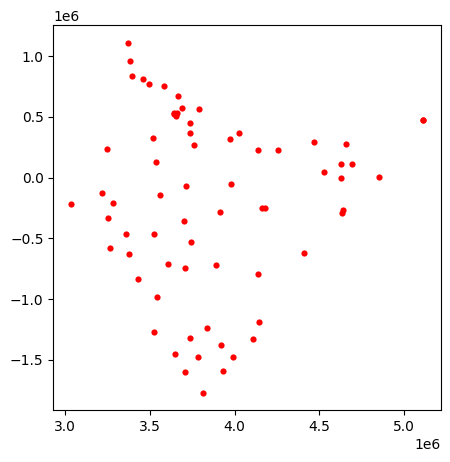

In [ ]:
# Запустим алгоритм DBSCAN для eps=1000000 и min_samples=5
clusters(places_m, 1000000, 5)

Ввиду некорректно заданных параметров для данной территории паттерны не выявлены.

Далее, основываясь на приведенных выше результатах, изменим значения обоих параметров (количество городов и расстояние), чтобы найти группу южных городов и еще одну группу городов на севере вокруг Нью-Дели.

In [ ]:
# Найдем отдельно группу городов на севере вокруг Нью-Дели
# Запустим алгоритм DBSCAN для eps=100000 и min_samples=5
# clusters(places_m, 100000, 5)
# Запустим алгоритм DBSCAN для eps=50000 и min_samples=3
# clusters(places_m, 50000, 3)
# Запустим алгоритм DBSCAN для eps=200000 и min_samples=7
# clusters(places_m, 200000, 7)

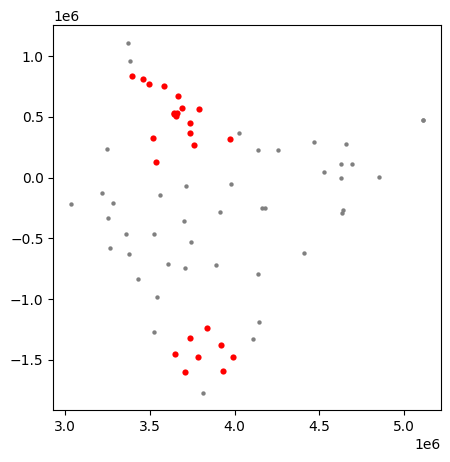

In [ ]:
# Найдем группу южных городов и еще одну группу городов на севере вокруг Нью-Дели
# Запустим алгоритм DBSCAN для eps=250000 и min_samples=8
# clusters(places_m, 220000, 7)
clusters(places_m, 250000, 8)

Чтобы каждый раз писать параметры, которые нужно изучить, настроим быстрый интерактивный инструмент, который позволит изменять оба параметра с помощью ползунков. Для этого воспользуемся библиотекой 'ipywidgets'.


In [ ]:
# Настроим интерактивный инструмент, который позволит изменять оба параметра 'eps' и 'min_samples' с помощью ползунков
# Зададим начало/конец/шаг диапазона параметров
interact(
    clusters, # Функция, которую нужно сделать интерактивной
    df=fixed(places_m), # Данные для передачи в df (не меняются)
    eps=(100000, 1000000, 50000), # Начало/конец/шаг диапазона eps
    min_samples=(3, 9, 1) # Начало/конец/шаг диапазона min_samples
);

interactive(children=(IntSlider(value=550000, description='eps', max=1000000, min=100000, step=50000), IntSlid…

**Выводы:**
*   Для идентификации кластеров были объединиены вычисления и визуализация выходных данных DBSCAN в одну функцию;
*   Чтобы одновременно найти группу южных городов и еще одну группу городов на севере вокруг Нью-Дели, в качестве примера были взяты следующие параметры:
      *   минимальное количество кластеров — восемь городов (min_samples); и
      *   расстояние — максимум 250 км (eps);
*   С помощью библиотеки 'ipywidgets' был настроен быстрый интерактивный инструмент, который позволил изменять оба параметра 'eps' и 'min_samples' с помощью ползунков.

## Этап 3. Результаты исследования

### Выводы

1.   В ходе решения первого задания "Распространение объектов недвижимости AirBnb в Пекине":
   *   С помощью гексагональной сетки была создана карта расположения объектов недвижимости;
   *   Вычислена и отображена на карте оценка плотности ядра (KDE) распределения объектов недвижимости;
   *   Используя слой с районами:
      *   Посчитано количество недвижимости по районам;
      *   Создана картограмма с отображением количества объектов недвижимости по районам;
      *   Создана картограмма с отображением плотности объектов недвижимости по районам.


2.   В ходе решения второго задания "Кластеры индийских городов":
   *   Для идентификации кластеров были объединиены вычисления и визуализация выходных данных DBSCAN в одну функцию;
   *   Чтобы одновременно найти группу южных городов и еще одну группу городов на севере вокруг Нью-Дели, в качестве примера были взяты следующие параметры:
      *   минимальное количество кластеров — восемь городов (min_samples); и
      *   расстояние — максимум 250 км (eps);
   *   Также с помощью библиотеки 'ipywidgets' был настроен быстрый интерактивный инструмент, который позволил изменять оба параметра 'eps' и 'min_samples' с помощью ползунков.